In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [3]:
print(y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [4]:
len(x_train[50]), len(x_train[400])

(118, 90)

In [5]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [6]:
import numpy as np
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

# Make model

In [7]:
model = tf.keras.models.Sequential()

In [8]:
model.add(tf.keras.layers.Embedding(input_length=500, input_dim=10000, output_dim=24)) # input  layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))  # LSTM을 하나 더 쓸 때
model.add(tf.keras.layers.LSTM(12, activation='tanh'))
# model.add(tf.keras.layers.Flatten()) # hidden layer
model.add(tf.keras.layers.Dense(46, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) # gadget

In [9]:
# hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=128)
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256)

Epoch 1/100
25/25 [==============================] - 20s 658ms/step - loss: 3.7195 - acc: 0.2704 - val_loss: 3.4674 - val_acc: 0.0479
Epoch 2/100
25/25 [==============================] - 16s 627ms/step - loss: 3.2134 - acc: 0.2591 - val_loss: 2.9466 - val_acc: 0.3532
Epoch 3/100
25/25 [==============================] - 16s 638ms/step - loss: 2.7723 - acc: 0.3510 - val_loss: 2.5808 - val_acc: 0.3532
Epoch 4/100
25/25 [==============================] - 16s 629ms/step - loss: 2.5263 - acc: 0.3510 - val_loss: 2.4439 - val_acc: 0.3532
Epoch 5/100
25/25 [==============================] - 16s 624ms/step - loss: 2.4537 - acc: 0.3510 - val_loss: 2.4077 - val_acc: 0.3532
Epoch 6/100
25/25 [==============================] - 16s 635ms/step - loss: 2.4323 - acc: 0.3510 - val_loss: 2.3950 - val_acc: 0.3532
Epoch 7/100
25/25 [==============================] - 16s 638ms/step - loss: 2.4233 - acc: 0.3510 - val_loss: 2.3891 - val_acc: 0.3532
Epoch 8/100
25/25 [==============================] - 16s 642ms

# Evaluation

In [10]:
# 학습시켰던 데이터
model.evaluate(pad_x_train, y_train)

281/281 [==============================] - 16s 56ms/step - loss: 1.3192 - acc: 0.6544


[1.319171667098999, 0.6544199585914612]

x_test 데이터 전처리

In [11]:
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [12]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [13]:
pad_make_x = pad_make(x_test)

In [14]:
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 4s 56ms/step - loss: 1.9766 - acc: 0.5419


[1.9766424894332886, 0.5418521761894226]

In [15]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 4s 57ms/step - loss: 1.9766 - acc: 0.5419


[1.9766424894332886, 0.5418521761894226]

train과 test의 acc 유사하기 때문에 학습이 잘 됨을 볼 수 있음

In [16]:
import matplotlib.pyplot as plt

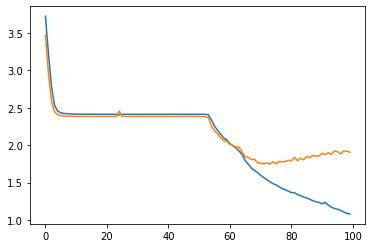

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

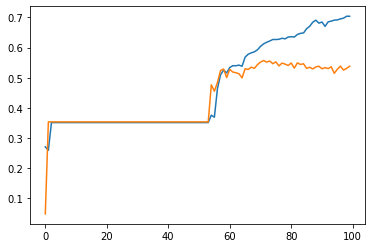

In [18]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

In [21]:
from sklearn.metrics import classification_report

In [22]:
y_train_pred = model.predict(pad_x_train)
y_train_pred[0]

array([1.09495326e-04, 3.01518652e-04, 2.99796702e-05, 9.48887348e-01,
       3.60721871e-02, 4.26443366e-05, 4.39618198e-05, 2.41327307e-05,
       2.33897544e-03, 1.44226113e-04, 6.03193184e-05, 8.37083091e-04,
       2.57277599e-04, 1.82426011e-04, 2.95750324e-05, 3.10845062e-05,
       4.68663359e-03, 5.32839767e-05, 6.56364209e-05, 2.44456250e-03,
       1.76014297e-03, 1.43663405e-04, 3.83795923e-05, 1.32817659e-04,
       5.58865686e-05, 3.96957439e-05, 4.46762242e-05, 2.56263702e-05,
       6.62437669e-05, 7.32105036e-05, 1.33795664e-04, 3.64374573e-05,
       5.64425973e-05, 4.29466381e-05, 4.79522605e-05, 4.97642213e-05,
       2.03241711e-04, 1.77017755e-05, 3.66823588e-05, 8.31674115e-05,
       6.54230025e-05, 5.69653603e-05, 3.74716910e-05, 2.05277229e-05,
       4.64420991e-05, 4.22798839e-05], dtype=float32)

In [26]:
y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(8982,)

In [27]:
len(y_train)

8982

In [28]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.30      0.80      0.44       432
           2       0.00      0.00      0.00        74
           3       0.95      0.95      0.95      3159
           4       0.88      0.89      0.89      1949
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00       139
           9       0.00      0.00      0.00       101
          10       0.09      0.61      0.15       124
          11       0.00      0.00      0.00       390
          12       0.00      0.00      0.00        49
          13       0.00      0.00      0.00       172
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        20
          16       0.42      0.66      0.51       444
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
y_test_pred = model.predict(pad_x_test)

In [31]:
y_pred = np.argmax(y_test_pred, axis=1)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.17      0.53      0.26       105
           2       0.00      0.00      0.00        20
           3       0.93      0.89      0.91       813
           4       0.70      0.72      0.71       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.07      0.37      0.11        30
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.11      0.22      0.15        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


비슷한 부분끼리 0임을 확인 -> words=10000 제한 때문에 0이 발생